<a href="https://colab.research.google.com/github/chris-lovejoy/CodingForMedicine/blob/main/exercises/Breast_cancer_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnosing Breast Cancer from Histology Features


**In this exercise, we will train different machine learning models (including a neural network) to predict whether a breast cancer sample is malignant or benign.**

Our models will use features extracted from breast samples from the publicly-available ["Breast Cancer Wisconsin" dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2).

This is a *classification* problem because we're asking the algorithm to classify samples into one of two classes: **malignant or benign**. We'll train a neural network for this task. You're then invited to try out other classification algorithms, such as:

- Random Forest
- K-nearest neighbours
- support vector machines (SVMs)

In this exercise, we'll learn how to:

- **Download data** and **load it into our Jupyter Notebook**
- **Import useful libraries** like pandas and sci-kit learn
- **Clean our data**
- **Divide our model** for training and testing
- **Quantify the performance** of our model


## Part 1: Downloading and importing our data

To train a machine learning model, the first thing we need is data.

There are various open-source datasets available on the internet. Great sources of datasets include [Kaggle](https://www.kaggle.com/), [Papers with Code](https://paperswithcode.com/datasets) and [data.world](https://data.world/datasets/health).

For this exercise, we're using a dataset available on Kaggle. You can view information about the dataset and download it [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). (You may need to create a Kaggle account, which is definitely worth doing - Kaggle is great.)

*Note: we want version 2 of the dataset.*

### Downloading and moving our data

Once we've downloaded the data, we're looking for the *.csv* file (it may be within a .zip file, which needs unzipping). CSV stands for 'comma-separated value' and means that each row of data is stored with values separated by commas. You can open the file in a 'plain text' editor (like Notepad (windows) or TextEdit (Mac)) to see what this looks like. 

Where we put that file will depend on whether we're running Jupyter Notebook locally or in Google Colab. These options are discussed in the [Jupyter Notebook setup exercise](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Setting_up_Jupyter_Notebook.ipynb).

**If you are using Google Colab**, you need to:
1. Make sure you are connected to a runtime (click Connect in the top right if you aren't)
2. Select the 'Files' folder on the left-hand tab
3. Drag our downloaded Breast Cancer 'data.csv' file into the Files tab (it should show the file uploading in the bottom left, and then you'll see 'data.csv' within the Files tab).

**If you are running Jupyter Notebook on your local computer**, you can simply:
1. Drag our 'data.csv' file into the same folder (aka. directory) as this Jupyter Notebook. 


### Importing the 'pandas' library

To load our data, we're going to use a popular library called ["Pandas"](https://pandas.pydata.org). A library is a collection of code with ready-made functions that we can use. We can import it with one line of code and then use it for a wide range of functionality.

In [ ]:
import pandas as pd

*If you are running on your local computer and get the following error, it means you need to install pandas on your computer. Instructions for doing so are available [here](https://pypi.org/project/pandas/). Drop me a message if any difficulties (see message form at the bottom of this document).*


> "ModuleNotFoundError: No module named 'pandas'


### Importing our data into the notebook

Once we have our data in the correct place and pandas imported, we can load it with the following command. This uses one of the *pandas* functions **read_csv()**, which lets us load csv files and save them as a **'DataFrame'** (which is basically a table).

In [ ]:
df = pd.read_csv('./data.csv')

Our table should now be saved in the 'df' variable, so we can see it by running the cell below.

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Part 2: Visualising our data

Before we start training our model, it's important to understand our dataset. The first step is to read any accompanying information we have about our data. For some projects, this may involve asking questions to whoever provided the data. In our case, there is a helpful description on Kaggle [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

The second step is to explore the data ourselves. Several functions can be helpful for this.

Let's start by using the **.head()** and **.tail()** functions to look at the top and bottom of our table:

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Can you modify the *df.head()* function to show the top 20 entries?**

A helpful function for understanding each variable is **.describe()**. Let's use this to look at radius_mean. Feel free to modify the code below to understand other variables.

In [ ]:
df.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

There are similar functions for looking at different averages, in particular, median and mode:

In [ ]:
df.radius_mean.median()

13.37

In [ ]:
df.radius_mean.mode()

0    12.34
Name: radius_mean, dtype: float64

Take some time to look at the different variables and understand them.


**Execute the line of code below, describe its output and explain how it differs from the previous *.describe()* command**

In [ ]:
df.describe()

Take some time to do more analysis, until you feel you really understand the data. This process is often referred to as "Exploratory Data Analysis", and searching for guides on this can provide useful suggestions. Don't be afraid to try making some graphs/plots to help understand the data. Here are some example guides, with suggestions of things you could look at:
- [An Extensive Guide to Exploratory Data Analysis](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)
- [Introduction to EDA - Simplilearn](https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis)

It may take some time to implement these the first time, but over time it can become a quick process. You can also start to build your own panel of functions that you re-use each time you work with a new dataset. (For example, I've created my own panels of functions [here](https://github.com/chris-lovejoy/data-science-pipeline) - although I'm increasingly using chatGPT to write them instead).

## Part 3: Cleaning our data

You may have noticed a column on the far right called "Unnamed: 32" and that it's full of "NaN" values. "NaN" stands for 'not a number' and can be caused by various things. In some cases, an empty column in a spreadsheet file can be picked up as a column, and all values are 'NaN's - that appears to be the case here.

We can remove the column using the **drop()** function:

In [ ]:
df = df.drop('Unnamed: 32', axis=1)

We're also not fussed about the 'id' column. **In the cell below drop the 'id' column.**

One common problem with real-world datasets is missing data or outliers. We can check the number of missing values with the isna() function. This returns a table that shows whether each cell is a NaN or not:

In [ ]:
df.isna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


And we can find the total number of NaNs in each column of our table using the following cell. (See if you can figure out how it works.)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
sum(df.isna().values)

The return value of `df.isna().values` is an array containing boolean values, indicating missing values in each element in the DataFrame.

The sum method treats `true` and `false` as `1` and `0` and returns the total count of missing values within the DataFrame.

**Add some `NaN` values into the DataFrame and check that the DataFrame does include `NaN` values. Clean up the DataFrame as before.**

It's great to see that there aren't any missing values in our table! We can say that our data is pretty 'clean', so there's not much else for us to do here. With many real-world datasets, there's more to be done here, but we can go on to the next step: preparing our data for training the model.

## Part 4: Preparing our data for model training

### Converting to binary

Computers like to work with binary values of 0 or 1 much more than with text. So let's convert our 'diagnosis' column values from 'M' for malignant and 'B' for binary into 1 and 0:

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

The map method replaces each value in the dataframe column specified by accepting a dictionary as an argument where the keys are the original values (`'M'` and `'B'` ) and the values to replace them with (`1` and `0`).

We can check what values the 'diagnosis' now has with the **unique()** function:

In [ ]:
df.diagnosis.unique()

array([1, 0])

The unique method returns an array of every unique value of the diagnosis column. In this case `1` and `0` are the unique values.

**Figure out in the cell below how many unique values there are in the 'Diagnosis' column ?**

We can use the `nunique` method to return the number of unique values of a column or row.

### Creating a train-test split

We need to divide our data into 'training' and 'test' data. We do this so we can understand whether our model is actually helpful. In the real world, we want to use our model on data it's never seen before. 

When training the model, we only show it the 'training' data. We can then test it on the 'test' data and use that to understand how well the model may perform on new (unseen) data.

Let's again use a function from the sci-kit learn library.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size = 0.15)

test_size determines what ratio of our data is kept back as 'test' data.

**Create a function that accepts the training and test data as arguments and prints the train and test size**.

The output should be something like below, where Number is the size of the training set.

`The size of the training set: Number `

`The size of the test set: Number`


In [ ]:
def train_test_size(train, test):

train_test_size(train, test)

We can use the `len()` function to check the size of the training and test data sets. See code below if you get stuck on the above task.

In [ ]:
def train_test_size(train, test):

  train_size = len(train)
  test_size = len(test)

  print (f'the size of training set : \n{train_size}' )
  print (f'the size of test set : \n{test_size}')

train_test_size(train, test)

### Normalising our data

In our dataset, different features have different ranges of values. For example, the maximum value of the 'perimeter_mean' feature is 188.5, while for the 'smoothness_mean' feature it is 0.1634.

For some machine learning models, this can affect the model's performance because it can care more about changes in the larger feature.

Therefore, it's best practice to 'normalise' the data, which involves bringing everything into the same range. One popular way of doing so is called 'max/min' normalisation, and it moves all values into the range 0 to 1.

Again, we can use a **library** to do this, so we don't have to write much code ourselves. We'll use the **sci-kit learn** library:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

If we look at our data again, we'll see that all values are now between 0 and 1:

In [ ]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.284869,0.374366,0.274480,0.159449,0.549517,0.173333,0.073477,0.131461,0.801733,...,0.221629,0.344052,0.201255,0.106051,0.386515,0.091903,0.064792,0.216357,0.321506,0.078925
1,0.0,0.222869,0.498140,0.225140,0.111516,0.640697,0.416600,0.105787,0.225199,0.580173,...,0.179651,0.573990,0.177848,0.074346,0.697550,0.328923,0.111422,0.449485,0.244037,0.378603
2,1.0,0.697099,0.254988,0.671066,0.594910,0.372032,0.203178,0.273664,0.420726,0.355905,...,0.811811,0.410359,0.742517,0.726947,0.430100,0.149667,0.228514,0.625430,0.186280,0.083927
3,0.0,0.146670,0.182618,0.138000,0.073807,0.361470,0.084565,0.003742,0.011948,0.348321,...,0.140164,0.260672,0.124409,0.061886,0.534438,0.082405,0.005527,0.035808,0.269663,0.185910
4,0.0,0.279190,0.649645,0.267501,0.157285,0.258193,0.119195,0.145150,0.116451,0.274106,...,0.212024,0.675014,0.191394,0.100890,0.340289,0.148783,0.194808,0.223127,0.159077,0.147338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.0,0.132803,0.345959,0.126598,0.064051,0.449309,0.103153,0.016000,0.039448,0.157096,...,0.106368,0.406090,0.091638,0.044460,0.399062,0.074486,0.016366,0.081821,0.072738,0.295354
479,0.0,0.225709,0.265472,0.221823,0.118515,0.493545,0.238482,0.123758,0.220676,0.291441,...,0.198150,0.454183,0.189800,0.090223,0.420855,0.174628,0.109105,0.347079,0.179972,0.190997
480,0.0,0.223816,0.252959,0.213461,0.117413,0.407240,0.128918,0.089246,0.160984,0.247021,...,0.180719,0.266648,0.169381,0.082653,0.403685,0.084724,0.121486,0.377663,0.198502,0.135046
481,1.0,0.438686,0.331417,0.456154,0.285175,0.451115,0.521195,0.523899,0.456958,0.591008,...,0.336535,0.313887,0.357040,0.185436,0.439345,0.462674,0.471006,0.609966,0.345555,0.307901


*(If you're having trouble downloading the library and importing it, you can skip this section and the code will still run - it just won't give as reliable a result.)*

**Note:** Normalisation across instances should be done after splitting the data between the training and test set, using only the data from the training set.

The test set plays the role of fresh, unseen data, so it should not be accessible at the training stage. Using any information from the test set before or during training is a potential **data leakage** that can cause bias in the performance evaluation.

We will apply the normalisation parameters previously obtained from the training set to normalise the test set.

In [ ]:
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [ ]:
test

Now for the fun part: training and assessing our model.

## Part 5: Model training

To keep things simple, we'll start by just using three features for our model. Let's make a list of prediction variables.

*(Not sure what a list is? Check out the [Python principles](https://github.com/chris-lovejoy/CodingForMedicine/blob/main/exercises/Python_Principles.ipynb) exercise.)*

In [ ]:
prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean']

We can now create our input 'x' variables and our output 'y' variables for the training and test sets:

In [ ]:
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

To create our training and test data, we select a subset of the training/test data by passing a list in the square brackets. We only select the columns specified in the list `prediction_var` of the DataFrame. 

We'll now import our model. We're going to use the 'MLPClassifier' from sci-kit learn. 'MLP' stands for 'multi-layer perceptron' and is a basic type of neural network.

In [ ]:
from sklearn.neural_network import MLPClassifier

We can declare our model and its variables as below. Here, we're using a neural network with 2 hidden layers with 5 neurons. (To understand the different model variants, you can check out the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).) Feel free to modify these variables and see how the results change.

In [ ]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))


Now, finally, we can train our model and generate predictions on our 'test' set.

In [ ]:
model.fit(train_x, train_y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

In [ ]:
predictions = model.predict(test_x)

That was it. In two lines of code, we just trained a neural network and used it to make some predictions. We first called **model.fit()** with our training data inputs and outputs, and then we called **model.predict()** on our test data inputs.

In the next section, we'll look at how good the predictions are.

## Part 6: Quantifying performance of our model


### F1 score, accuracy and AUC

A common way to quantify model performance is the F1 score. This tests whether the model is making balanced predictions (and not over-predicting or under-predicting the number of cases of malignant cancer).

The score ranges from 0 to 1, with 0 being really bad and 1 being perfect.

The equation for F1 score is:

![F1 equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)



We can calculate it using sci-kit learn modules (noticing a pattern?), as below:

In [ ]:
from sklearn.metrics import f1_score

f1_score = f1_score(test_y, predictions)

print("The f1 score is ", "%.2f" %f1_score)

The f1 score is  0.83


Other popular metrics are the overall accuracy and the AUC score:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 

accuracy = accuracy_score(test_y, predictions)
AUC = roc_auc_score(test_y, predictions)

print("The accuracy is ", "%.2f" %accuracy)
print("The AUC is ", "%.2f" %AUC)


The accuracy is  0.87
The AUC is  0.87


### The confusion matrix 

A helpful way to visualise our results, beyond just single-point scores, is the confusion matrix. This involves plotting actual classes vs predicted classes.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, predictions)
conf_matrix

array([[48,  7],
       [ 4, 27]])

To better understand this matrix, let's plot it in a more visually-aesthetic way, using the popular visualisation library: [**matplotlib**](https://matplotlib.org).

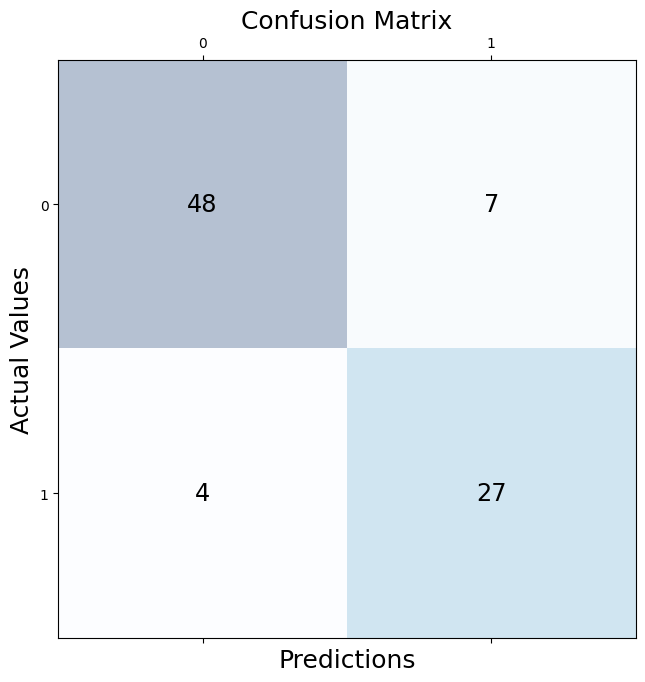

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Hopefully, the confusion matrix is now self-explanatory!

## Next Steps

Have a go at modifying our pipeline, including:

- Different features (using the 'prediction_var' list)
- Different parameters (such as different learning rates and neural network layers or different train/test splits)
- Different models (see below)

Popular classifiers to try as alternative models include:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [K-nearest neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support vector machines (SVMs)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

These links will take you to the documentation. See if you can work out how to import them and then train the model based on the description and examples that they provide.


**Appendix:**

- [Imputing missing values]( https://scikit-learn.org/stable/modules/impute.html#:~:text=Missing%20values%20can%20be%20imputed,for%20different%20missing%20values%20encodings.)


Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**